### ONLINE PAYMENT FRAUD DETECTION (Classification task)


In [167]:
## packages for data analysis
import pandas as pd
import numpy as np

## visualize your data
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data

In [24]:
data = pd.read_csv('Online Payment Fraud Detection.csv')

features = data.columns[:-1].tolist()

In [4]:
## load data

data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [28]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Fraud cases and non Fraud cases

In [7]:
## number of fraud cases

fraud_cases=len(data[data['isFraud']==1])

print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 1142


In [8]:
## number of non-fraud cases

non_fraud_cases=len(data[data['isFraud']==0])

print(' Number of non-Fraud Cases:', non_fraud_cases)

 Number of non-Fraud Cases: 1047433


In [9]:
## NULL VALUES

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
## DESCRIPTIVE STATISTICS

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [13]:
## INFORMATION

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [15]:
data.shape

(1048575, 10)

In [16]:
data.size

10485750

In [17]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [36]:
## check the data types

data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

## Explorative Data Analysis


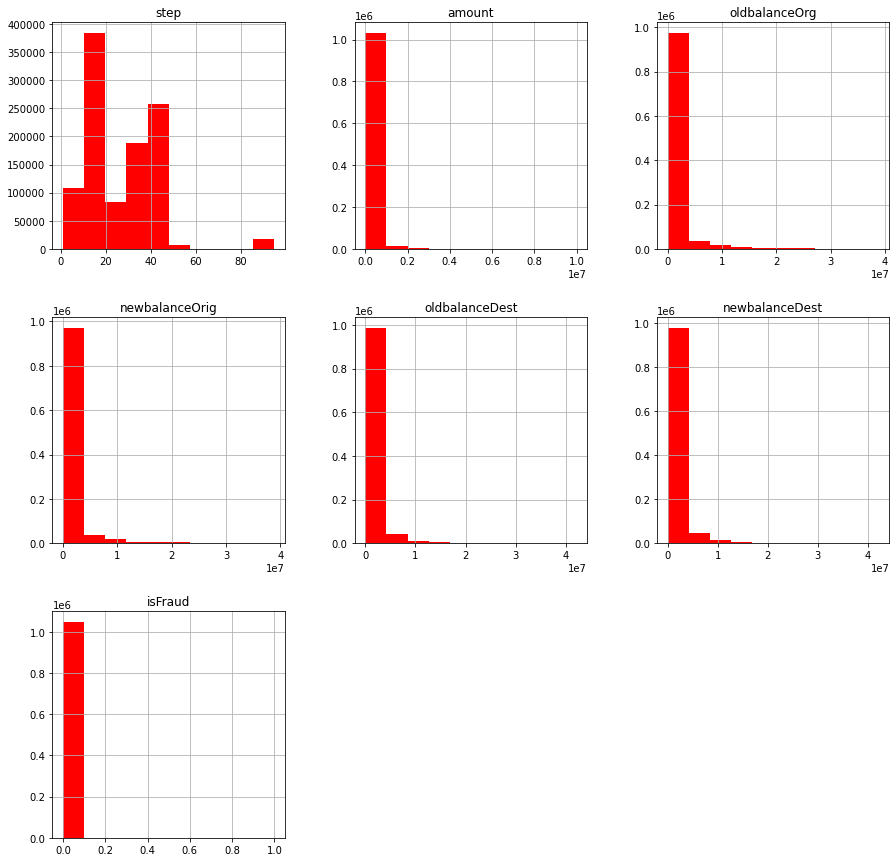

In [23]:
##  Univariate analysis
data.hist(figsize=(15,15),color='red')
plt.show()

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

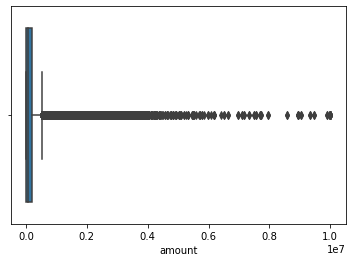

In [39]:
## check for outliers
sns.boxplot(data['amount'])


C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

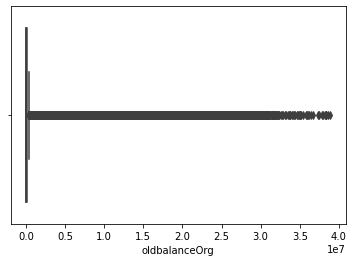

In [40]:

sns.boxplot(data['oldbalanceOrg'])

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceDest'>

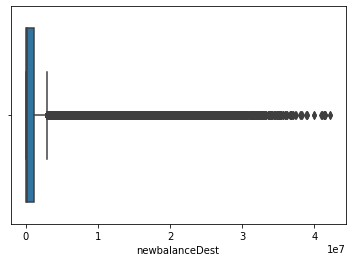

In [43]:

sns.boxplot(data['newbalanceDest'])

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceDest'>

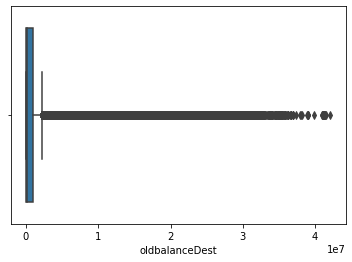

In [44]:

sns.boxplot(data['oldbalanceDest'])

<AxesSubplot:>

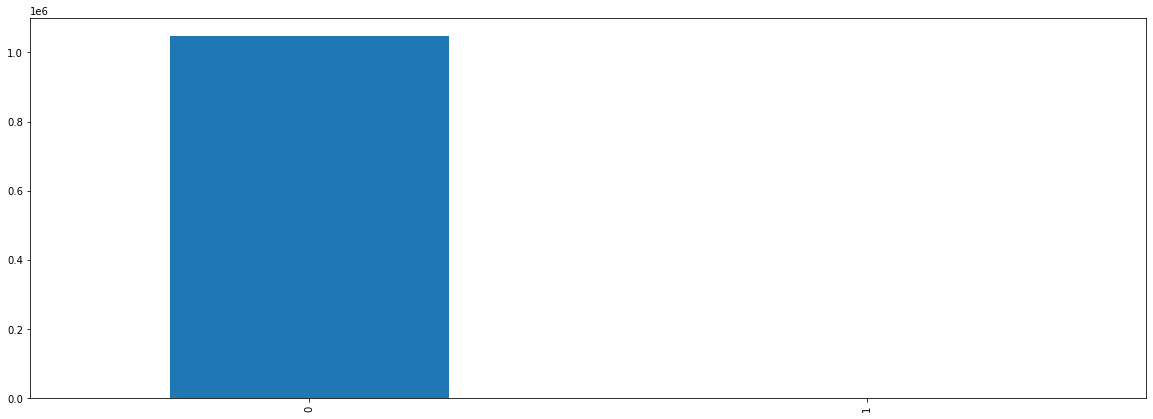

In [162]:
data['isFraud'].value_counts().plot(kind='bar')

<Figure size 720x720 with 0 Axes>

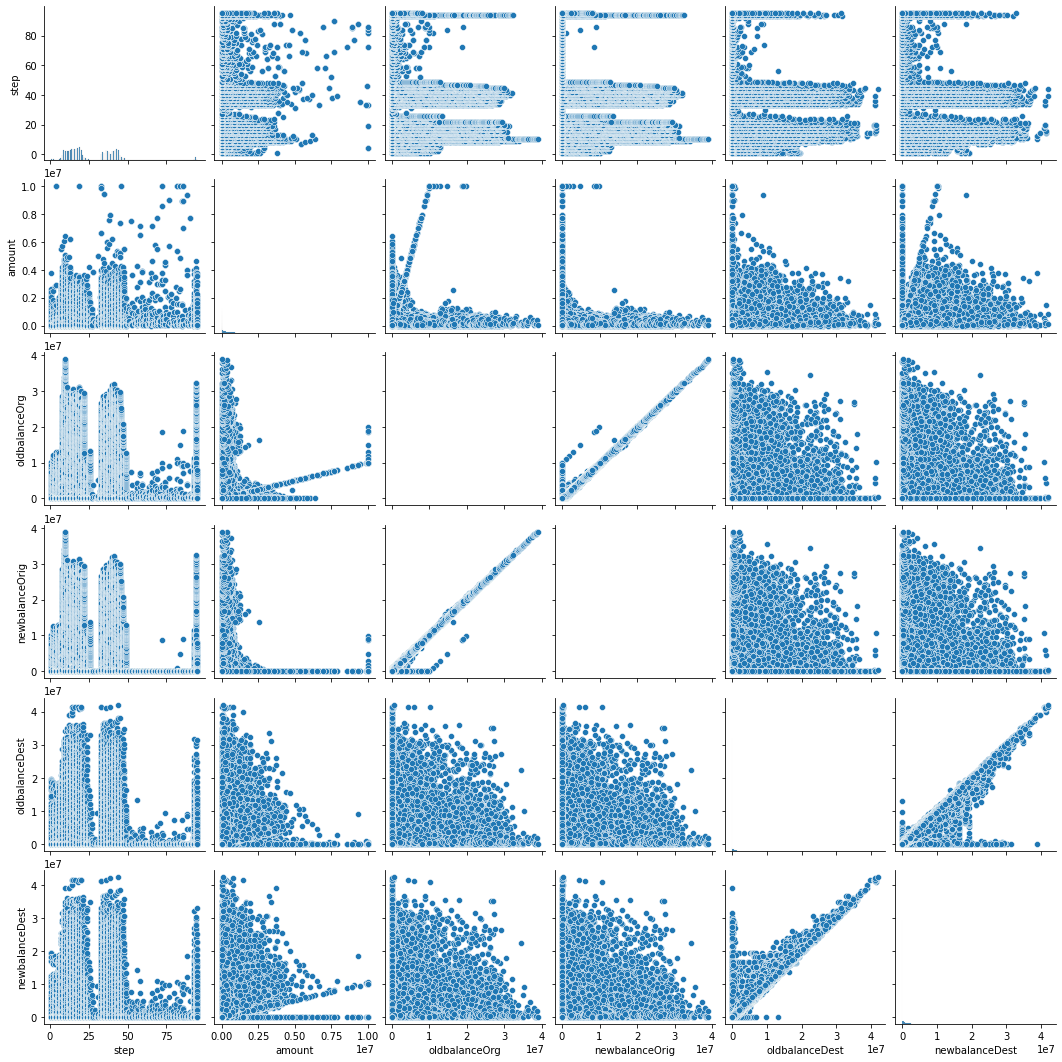

In [166]:
# Lets check out the pairplot
plt.figure(figsize=(10,10))
sns.pairplot(data[features])
plt.show()

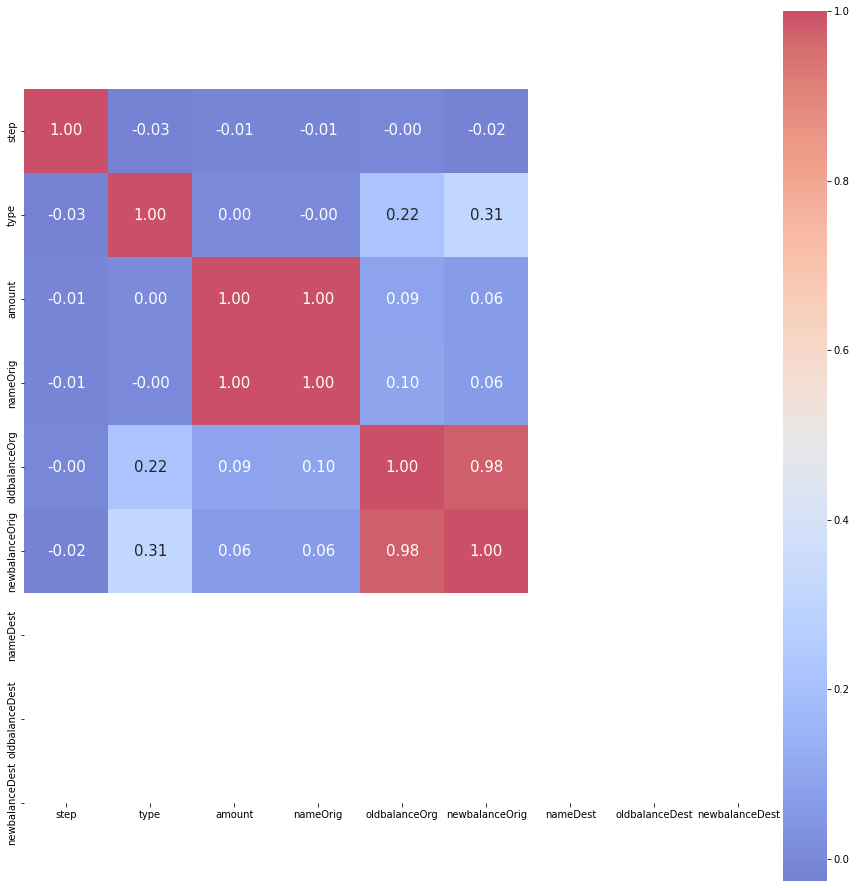

In [163]:
## exploring correlations

plt.figure(figsize=(16,16))
sns.heatmap(data=data[features].corr(), cbar=True, fmt='.2f', xticklabels= features, annot_kws={'size': 15},
            yticklabels=features, alpha=0.7, cmap='coolwarm', square=True, annot=True)
plt.show()


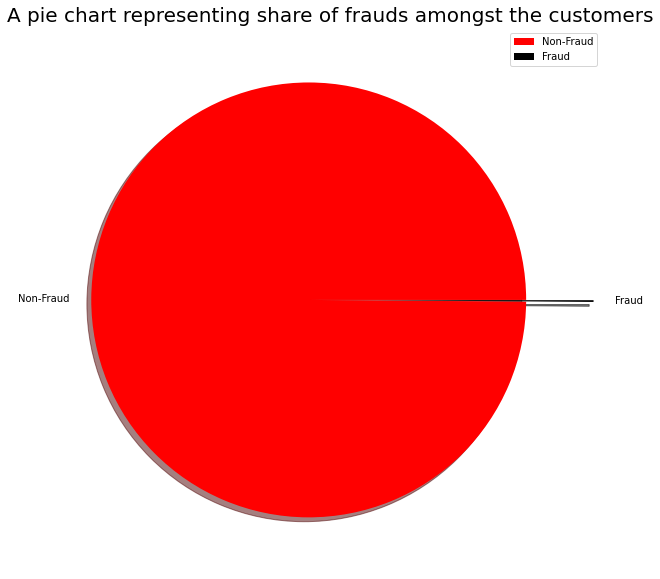

In [54]:
## a pie chart showing pie chart distribution of fraud and non-fraud
labels = ['Non-Fraud', 'Fraud']
colors = ['red', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [55]:
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

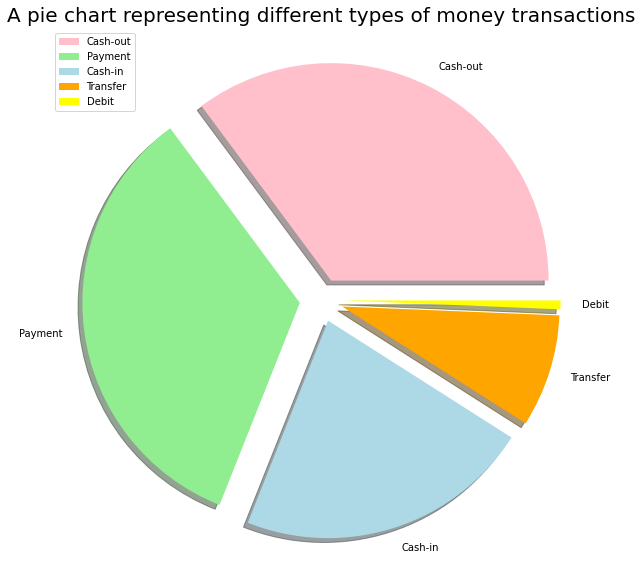

In [59]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [60]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 58


C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


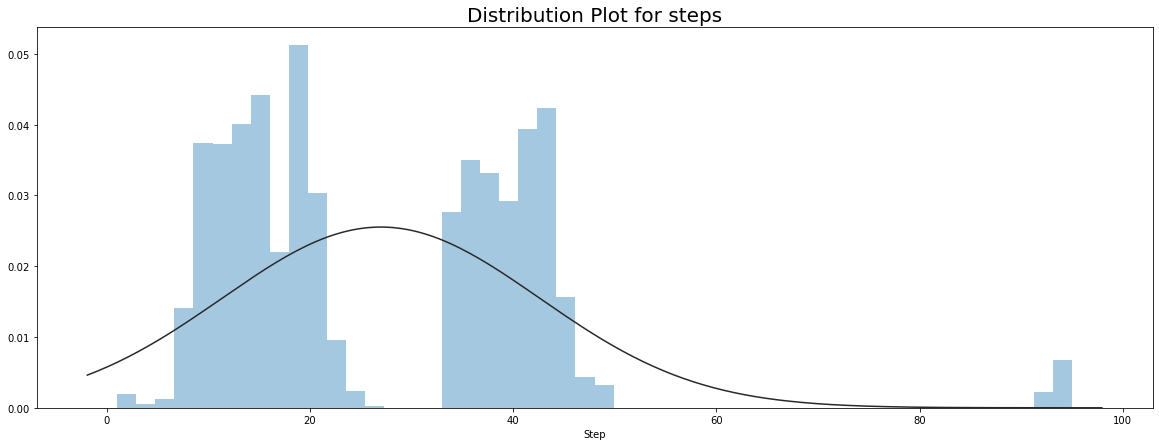

In [67]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(20, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

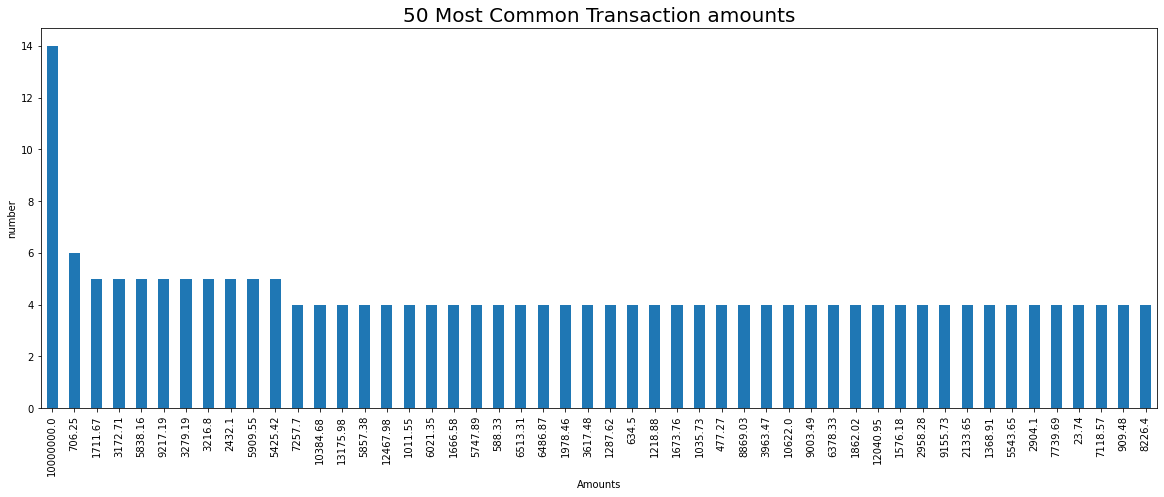

In [65]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (20, 7)

data['amount'].value_counts().head(50).plot.bar()
plt.title('50 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('number')
plt.show()

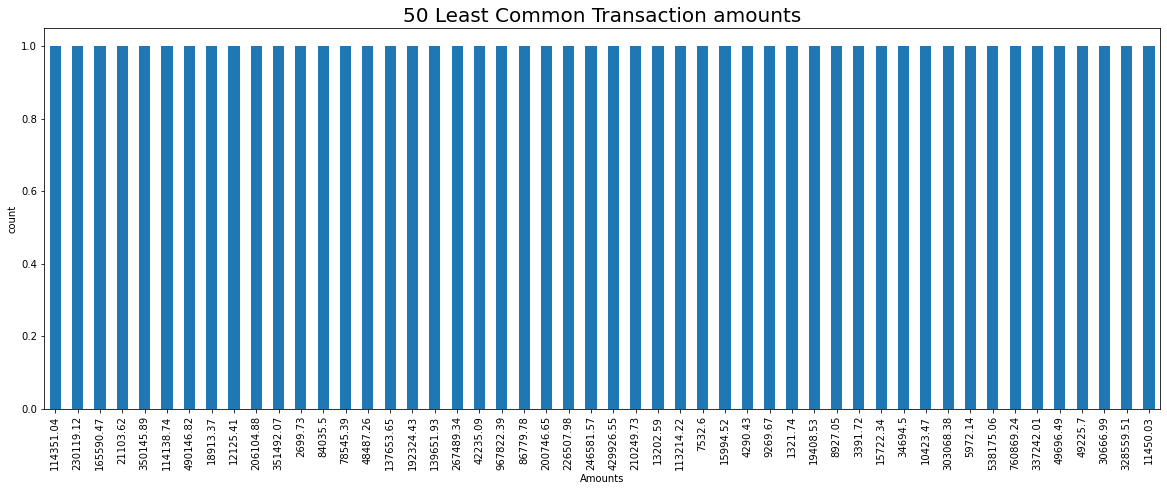

In [66]:
##checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (20, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [68]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [69]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 564
The number of fraudulent CASH_OUTs = 578


In [70]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0


In [73]:
# defining a dataset containing only transfer type of transactions

dataTRANSFER = data.loc[data['type'] == 'TRANSFER']

dataTRANSFER = pd.DataFrame(dataTRANSFER)

dataTRANSFER.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


In [72]:
# defining a dataset containing only transfer type of transactions

dataCASH_OUT = data.loc[data['type'] == 'CASH_OUT']

dataCASH_OUT = pd.DataFrame(dataCASH_OUT)

dataCASH_OUT.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0


In [75]:
data['nameDest'].value_counts().head()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
Name: nameDest, dtype: int64

In [76]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape

(460394, 10)

In [77]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0


In [78]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(460394, 8)

In [79]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [81]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


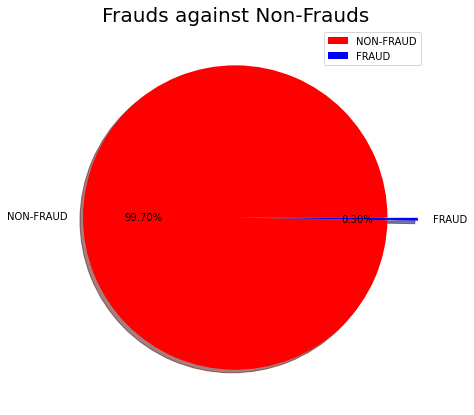

In [84]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()

# plotting a pie chart to represent the fraction of the frauds 

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['red', 'blue']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds against Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [85]:
X['isFraud'].value_counts()

0    459252
1      1142
Name: isFraud, dtype: int64

In [86]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)


In [89]:
## load dependent and independent sets
Y.head(), X.head()

(2     1
 3     1
 15    0
 19    0
 24    0
 Name: isFraud, dtype: int64,
     step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 2      1     0     181.00          181.0             0.0             0.0   
 3      1     1     181.00          181.0             0.0         21182.0   
 15     1     1  229133.94        15325.0             0.0          5083.0   
 19     1     0  215310.30          705.0             0.0         22425.0   
 24     1     0  311685.89        10835.0             0.0          6267.0   
 
     newbalanceDest  
 2             0.00  
 3             0.00  
 15        51513.44  
 19            0.00  
 24      2719172.89  )

In [91]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

# checking the new shapes
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (345295, 7)
x_test:  (115099, 7)
y_train:  (345295,)
y_test:  (115099,)


In [159]:
##importing metrics to be used

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [94]:
# performing standard scaling on the data for better fit

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [96]:
x_train, x_test

(array([[ 0.88898111,  0.48189154,  0.00743743, ..., -0.15883066,
         -0.55092144, -0.54923097],
        [ 1.09050016,  0.48189154, -0.04864868, ..., -0.15883066,
         -0.30559631, -0.3229063 ],
        [-0.52165222,  0.48189154,  0.0572951 , ..., -0.15883066,
          0.08973751,  0.0681431 ],
        ...,
        [-0.79034429,  0.48189154, -0.28892644, ..., -0.15883066,
          0.15077065,  0.08137428],
        [-0.72317127,  0.48189154, -0.30592762, ..., -0.15883066,
         -0.27861105, -0.32893386],
        [-0.79034429,  0.48189154,  0.30737135, ..., -0.15883066,
         -0.51265321, -0.43927961]]),
 array([[ 0.48594301,  0.48189154, -0.42698613, ..., -0.15883066,
          2.58385666,  2.37751553],
        [-0.58882524,  0.48189154, -0.56908692, ..., -0.15883066,
         -0.55092144, -0.62022689],
        [-0.52165222,  0.48189154, -0.36862141, ..., -0.15883066,
          0.3551792 ,  0.26589213],
        ...,
        [ 1.09050016,  0.48189154, -0.32549326, ..., -

## Modelling using Random Forest Classifier

In [130]:
## using Random forest classifier 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)

In [131]:
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [132]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
## getting accuracy score

Training_accuracy = clf.score(x_train, y_train)
Test_accuracy = clf.score(x_test, y_test)

In [134]:
print(f'Training accuracy: {training_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.9984013669471032
Test accuracy: 0.9983666235154085


In [135]:
pd.DataFrame({'actual_Result': y_test, 'predicted_Result': y_pred})

,actual_Result,predicted_Result
626102,0,0
418782,0,0
458039,0,0
111964,0,0
66622,0,0
...,...,...
626430,0,0
937329,0,0
939877,0,0
256586,0,0


C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


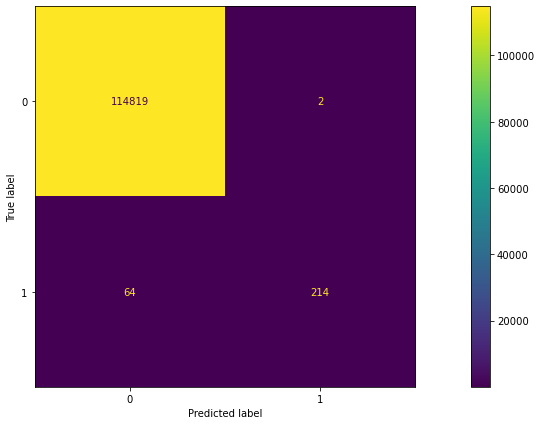

In [136]:
## confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test,y_test)

In [137]:
## classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114821
           1       0.99      0.77      0.87       278

    accuracy                           1.00    115099
   macro avg       1.00      0.88      0.93    115099
weighted avg       1.00      1.00      1.00    115099



In [138]:
from sklearn.metrics import average_precision_score


# score of the model
clf = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", clf)

The Area under Precision Recall Curve Score is 0.7632125844921042


## Modelling using Logistic Regression

In [139]:
## Using Loistic Regression

from sklearn.linear_model import LogisticRegression

LogisticRegr = LogisticRegression()
LogisticRegr.fit(x_train, y_train)

LogisticRegression()

In [140]:
## getting accuracy score


training_accuracy = LogisticRegr.score(x_train,y_train)
test_accuracy = LogisticRegr.score(x_test,y_test)

In [141]:
print(f'Training accuracy: {training_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.9984013669471032
Test accuracy: 0.9983666235154085


C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


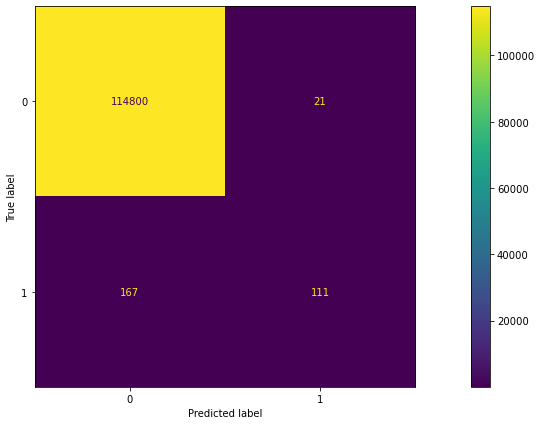

In [142]:
## confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LogisticRegr, x_test,y_test)

In [144]:
## classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114821
           1       0.99      0.77      0.87       278

    accuracy                           1.00    115099
   macro avg       1.00      0.88      0.93    115099
weighted avg       1.00      1.00      1.00    115099



## Modelling Using Decision Tree Classifier 

In [145]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [146]:
tree_model.score(x_train, y_train)

1.0

In [147]:
## check accuracy score

tree_model.score(x_test, y_test)

0.9990008601291063

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


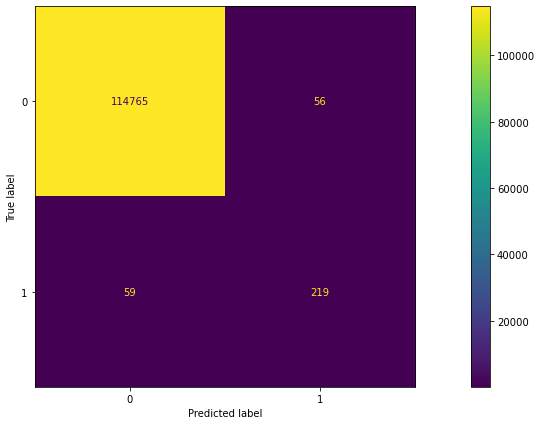

In [149]:
## confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model, x_test,y_test)

## Modelling Using KNearest Neighbor

In [153]:
## Using KNN

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [155]:
# Predict the test set results
y_pred = KNN.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
## check accuracy score

print(accuracy_score(y_test, y_pred))

0.9988618493644602


C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


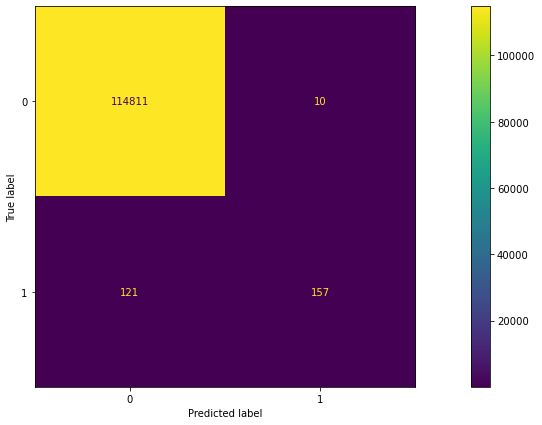

In [157]:
## confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(KNN, x_test,y_test)

In [160]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[114811     10]
 [   121    157]]
0.7056179775280899
